<a href="https://colab.research.google.com/github/doxenix/ZUM/blob/main/ZUM_img_22q4_projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dominik Zalewski s24216

Dzień dobry,
Proszę o możlwiość poprawy jeśli nie uda się otrzymać oceny 5. Poprawię wtedy projekt zgodnie z uwagami.

Z poważaniem,
Dominik Zalewski


Notatniki najlepiej otworzyć w Google Collab

# Obraz - transfer learning - praca domowa
Ostatnia aktualizacja: 2022.12.10

Z dokumentacji [Keras](https://keras.io/guides/transfer_learning/): *Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem.*

Głównym celem pracy domowej jest stworzenie klasyfikatora, który będzie odróżniał zdjęcia obiektów w wybranym przez nas zbiorze. Użyjemy do tego jednego z [gotowych modeli Keras](https://keras.io/api/applications/), wytrenowanego wcześniej na zbiorze Imagenet. 

Przydatne źródła:
- [transfer learning vgg16 + tf_flowers](https://towardsdatascience.com/transfer-learning-with-vgg16-and-keras-50ea161580b4)
- [Keras - transfer learning](https://keras.io/guides/transfer_learning/)

### Wybierz swój zbiór danych### 
Chcemy mieć co najmniej 2-3 klasy. Możesz użyć gotowego zbioru (np. z [katalogu tensorflow](https://www.tensorflow.org/datasets/catalog/overview) lub [kaggle](https://www.kaggle.com/datasets)) albo użyć własnych danych. 
- [Przykładowy zbiór: tf_flowers](https://www.tensorflow.org/datasets/catalog/tf_flowers). 
- [Przykładowy zbiór: plant_leaves](https://www.tensorflow.org/datasets/catalog/plant_leaves). 

Wczytaj i przygotuj dane do treningu. 



In [1]:
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import numpy as np

In [2]:
## Loading images and labels
(train_ds, train_labels), (test_ds, test_labels) = tfds.load(
    "tf_flowers",
    split=["train[:70%]", "train[:30%]"], ## Train test split
    batch_size=-1,
    as_supervised=True,  # Include labels
)

## Resizing images
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))

## Transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)

### Wczytaj wytrenowany model do klasyfikacji obrazu. ###
Może to być jeden z gotowych [modeli dostępnych w Keras](https://keras.io/api/applications/). Wczytujemy go z wytrenowanymi już wcześniej wagami na Imagenecie (weights='imagenet'). 

Model możemy wczytać bez ostatnich warstw (include_top=False) i dodać je potem ręcznie, dostosowane do liczby klas w naszym zbiorze. Imagenet ma 1000 klas, my prawdopodobnie będziemy mieć ich mniej. 

Pamiętaj, żeby wyłączyć lub ograniczyć trening części modelu z wytrenowanymi już wagami (trainable=False). 

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model_VGG = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)
base_model_VGG.trainable = False ## Not trainable weights

## Preprocessing input
train_ds = preprocess_input(train_ds) 
test_ds = preprocess_input(test_ds)

In [4]:
base_model_VGG.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

### Zadanie 1: Wytrenuj model na swoich danych ###
**(Zadanie na ocenę 3)**

Wytrenuj wybrany model na swoich danych. Omów eksperyment i wyniki (100 słów). 

## Model VGG

W pierwszy korku wykorzystamy gotowy już model VGG16

In [5]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model_VGG = models.Sequential([
    base_model_VGG,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

model_VGG.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

model_VGG.fit(train_ds, train_labels, epochs=50, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/50
65/65 [==============================] - 13s 134ms/step - loss: 1.7707 - accuracy: 0.4954 - val_loss: 1.2127 - val_accuracy: 0.5447
Epoch 2/50
65/65 [==============================] - 7s 106ms/step - loss: 0.8840 - accuracy: 0.6910 - val_loss: 1.2330 - val_accuracy: 0.6420
Epoch 3/50
65/65 [==============================] - 7s 106ms/step - loss: 0.6661 - accuracy: 0.7888 - val_loss: 0.9989 - val_accuracy: 0.6634
Epoch 4/50
65/65 [==============================] - 7s 105ms/step - loss: 0.4522 - accuracy: 0.8457 - val_loss: 1.0118 - val_accuracy: 0.7121
Epoch 5/50
65/65 [==============================] - 8s 123ms/step - loss: 0.3409 - accuracy: 0.8822 - val_loss: 0.9733 - val_accuracy: 0.6712
Epoch 6/50
65/65 [==============================] - 8s 122ms/step - loss: 0.2595 - accuracy: 0.9085 - val_loss: 1.1081 - val_accuracy: 0.6751
Epoch 7/50
65/65 [==============================] - 7s 101ms/step - loss: 0.2320 - accuracy: 0.9217 - val_loss: 1.0949 - val_accuracy: 0.7004
Epoch

## Ewaluacja

In [6]:
model_VGG_score_train = model_VGG.evaluate(train_ds, train_labels)
model_VGG_score_test = model_VGG.evaluate(test_ds, test_labels)

35/35 [==============================] - 4s 115ms/step - loss: 0.3504 - accuracy: 0.8847


*TODO: omówienie (100 słów)*

## Omówienie ekseperymentu z Zadania 1

W pierwszym zadaniu skorzystaliśmy z gotowego modelu VGG16 udostępnionego przez Keras. Od razu możemy zauważyć, że transfer learing jest niezwykle prostą i przydatną metodą w przypadku trenowania modeli pod kątem klasyfikacji obrazów. Nasze dane zostały w pierwszej kolejności przekształcone do wymiarów 150x150. Następnie wczytaliśmy model VGG zgodnie ze specyfikacją opisaną w zadaniu. Model składa się z kilkunastu warstw, my dołożyliśmy jeszcze na koniec 3 -ostatnia z funkcją aktywacji softmax i inputem o rozmiarze 5 – dokładnie tyle ile klas jest w naszym zbiorze treningowym. 

Trening modelu wyglądał poprawnie, accuracy bardzo szybko zaczęło się poprawiać, loss – również prawidłowo z każdą epoką zaczął spadać. Z racji, że ustawiliśmy EarlyStopping, trening zatrzymał się na 9 epoce. Obserwowaliśmy zachowanie val_accuracy – czyli accuracy dla danych walidacyjnych. Ostatecznie, po ewaluacji modelu otrzymaliśmy `~0.84 accuracy` dla danych treningowych oraz `~0.88` dla testowych, co jest niezłym wynikiem.


### Zadanie 2: Dodatkowe sieci ###
**(Zadanie na ocenę 4, po wykonaniu  zadania 1)**

Przeprowadź to samo na dwóch dodatkowych sieciach i omów wyniki (100 słów). 

Czyli jeśli w zadaniu 1 użyliśmy np. VGG to teraz wybieramy sobie np. ResNet i MobileNet. 

In [7]:
from tensorflow.keras.applications.resnet50 import ResNet50

# Loading ResNet50 model
base_model_ResNet = ResNet50(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)
base_model_ResNet.trainable = False ## Not trainable weights

In [8]:
base_model_ResNet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']      

In [9]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model_ResNet = models.Sequential([
    base_model_ResNet,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

model_ResNet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

model_ResNet.fit(train_ds, train_labels, epochs=50, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/50
65/65 [==============================] - 12s 119ms/step - loss: 2.2043 - accuracy: 0.4866 - val_loss: 0.8731 - val_accuracy: 0.6751
Epoch 2/50
65/65 [==============================] - 6s 86ms/step - loss: 0.7271 - accuracy: 0.7406 - val_loss: 0.7995 - val_accuracy: 0.6868
Epoch 3/50
65/65 [==============================] - 5s 77ms/step - loss: 0.4983 - accuracy: 0.8214 - val_loss: 0.9723 - val_accuracy: 0.6868
Epoch 4/50
65/65 [==============================] - 5s 84ms/step - loss: 0.3686 - accuracy: 0.8691 - val_loss: 0.9177 - val_accuracy: 0.7160
Epoch 5/50
65/65 [==============================] - 5s 80ms/step - loss: 0.2791 - accuracy: 0.9027 - val_loss: 0.8734 - val_accuracy: 0.7374
Epoch 6/50
65/65 [==============================] - 5s 84ms/step - loss: 0.1615 - accuracy: 0.9450 - val_loss: 0.8386 - val_accuracy: 0.7471
Epoch 7/50
65/65 [==============================] - 5s 81ms/step - loss: 0.1371 - accuracy: 0.9557 - val_loss: 0.9156 - val_accuracy: 0.7374
Epoch 8/50


In [10]:
model_ResNet_score_train = model_ResNet.evaluate(train_ds, train_labels)
model_ResNet_score_test = model_ResNet.evaluate(test_ds, test_labels)

35/35 [==============================] - 3s 71ms/step - loss: 0.1196 - accuracy: 0.9691


In [11]:
from tensorflow.keras.applications.mobilenet import MobileNet

# Loading ResNet50 model
base_model_MobileNet = ResNet50(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)
base_model_MobileNet.trainable = False ## Not trainable weights

In [12]:
base_model_MobileNet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']      

In [13]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model_MobileNet = models.Sequential([
    base_model_MobileNet,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

model_MobileNet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

model_MobileNet.fit(train_ds, train_labels, epochs=50, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/50
65/65 [==============================] - 11s 107ms/step - loss: 2.2725 - accuracy: 0.4925 - val_loss: 1.1020 - val_accuracy: 0.6362
Epoch 2/50
65/65 [==============================] - 5s 82ms/step - loss: 0.7370 - accuracy: 0.7460 - val_loss: 0.8417 - val_accuracy: 0.7237
Epoch 3/50
65/65 [==============================] - 5s 80ms/step - loss: 0.4304 - accuracy: 0.8389 - val_loss: 0.8882 - val_accuracy: 0.7140
Epoch 4/50
65/65 [==============================] - 5s 75ms/step - loss: 0.2937 - accuracy: 0.8886 - val_loss: 0.8480 - val_accuracy: 0.7237
Epoch 5/50
65/65 [==============================] - 5s 78ms/step - loss: 0.1833 - accuracy: 0.9377 - val_loss: 0.9313 - val_accuracy: 0.7451
Epoch 6/50
65/65 [==============================] - 5s 76ms/step - loss: 0.1348 - accuracy: 0.9528 - val_loss: 1.1650 - val_accuracy: 0.7062
Epoch 7/50
65/65 [==============================] - 5s 75ms/step - loss: 0.1207 - accuracy: 0.9606 - val_loss: 1.0691 - val_accuracy: 0.7315
Epoch 8/50


In [14]:
model_MobileNet_score_train = model_MobileNet.evaluate(train_ds, train_labels)
model_MobileNet_score_test = model_MobileNet.evaluate(test_ds, test_labels)

35/35 [==============================] - 2s 60ms/step - loss: 0.0031 - accuracy: 1.0000


## Omówienie eksperymentu z Zadania 2

W pierwszym przypadku użyliśmy gotowego modelu ResNet50. W porównaniu z modelem VGG16 ma on znacznie więcej warstw. Trening zakończyliśmy w 11 epoce tak samo  dzięki EearlyStopping. W samych treningu możemy zauważyć, że accuracy na danych treningowych już w 5 epoce przebiło 0.90 i w 11. Zatrzymało się na 0.97. Loss spadał prawidłowo. Po ewaluacji mamy: 0.92 accuracy na danych treningowych i 0.96 na testowych co wypada o wiele lepiej niż wcześniej.

Drugi eksperyment z wykorzystaniem modelu MobileNet, ciekawostką jest to, że mimo sporej ilości warstw model jest modelem lekkim (waży około 16 MB). A jak wyglądał trening? Znaczniej lepiej – osiągnęliśmy accuracy po ewaluacji 0.95 na danych treningowych, a na testowych 100% co jest jak dotąd najlepszym wynikiem. 

Accuracy na zbiorze walidacyjnym w przypadku obu modeli zachowywało się podobnie.

### Zadanie 3: Trening od zera i porównanie ###
**(Zadanie na ocenę 5, po wykonaniu zadania 1 i 2)**

Spróbuj skonstruować swój własny model i wytrenować go 'od zera' na tych samych danych. Porównaj i omów swój ekeperyment i wyniki (100 słów).

Spróbjemy teraz wykonać trening z wykorzystaniem własnego modelu

Inspiracja: https://www.tensorflow.org/tutorials/images/data_augmentation

Na koniec omówię kroki które zostały tutaj wykonane.

In [15]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y), 
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets.
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)

train_ds = prepare(train_ds, shuffle=True, augment=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)

In [16]:
model = tf.keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(5)
])


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50,
  callbacks=[es]
)

Epoch 1/50
92/92 [==============================] - 18s 162ms/step - loss: 1.4130 - accuracy: 0.3856 - val_loss: 1.2049 - val_accuracy: 0.5177
Epoch 2/50
92/92 [==============================] - 13s 129ms/step - loss: 1.1476 - accuracy: 0.5293 - val_loss: 1.1673 - val_accuracy: 0.5559
Epoch 3/50
92/92 [==============================] - 13s 128ms/step - loss: 1.0895 - accuracy: 0.5531 - val_loss: 1.0708 - val_accuracy: 0.6376
Epoch 4/50
92/92 [==============================] - 13s 138ms/step - loss: 1.0155 - accuracy: 0.5875 - val_loss: 0.9479 - val_accuracy: 0.6540
Epoch 5/50
92/92 [==============================] - 13s 130ms/step - loss: 0.9346 - accuracy: 0.6325 - val_loss: 0.9140 - val_accuracy: 0.6621
Epoch 6/50
92/92 [==============================] - 13s 130ms/step - loss: 0.8901 - accuracy: 0.6488 - val_loss: 0.9629 - val_accuracy: 0.5967
Epoch 7/50
92/92 [==============================] - 13s 136ms/step - loss: 0.8674 - accuracy: 0.6591 - val_loss: 0.9020 - val_accuracy: 0.6540

In [17]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)       

In [18]:
model_score_train = model.evaluate(train_ds)
model_score_test = model.evaluate(test_ds)


12/12 [==============================] - 1s 58ms/step - loss: 0.6858 - accuracy: 0.7166


## Omówienie eksperymentu z Zadania 3

Te same dane wczytamy jeszcze raz, ponieważ wcześniej je przeprocesowaliśmy pod kątem inputu dla gotowych już modeli. Tym razem przeskalowujemy obraz do wymiaru 180x180 a także wykonujemy standaryzację pikseli (zamieniamy na przedział 0-1). Najważniejszym krokiem w tym eksperymencie jest wykonanie augmentacji. Ma to za zadanie nieco zmienić obrazy na wejściu do modelu – w naszym przypadku wykonujemy lekką rotację o 20%. Jest to celowy zabieg, utrudni to modelowi rozpoznawanie obrazów podczas treningu, co w rezultacie przełoży się na lepsze wyniki po wytrenowaniu. 
Architektura modelu została lekko zmodyfikowana (z tutorialu TF) i dodano 2 warstwy Dropout. Zabieg ten w porównaniu bez tych dwóch warstw dość mocno poprawił wynik (accuracy wcześniej nie dochodziło do 70%)

Sprawdźmy jak wyglądał trening: accuracy rosło od 17 epoki już powoli. Trzeba przyznać że tym razem val_accuracy rosło i utrzymywała się na zbliżononym poziomie tak jak accuracy na danych treningowych.
Wyniki jak na model od zera są naprawdę dobre. Osiągnęliśmy niemal identyczne rezultaty tak jak z wykorzystaniem gotowego modelu VGG-16. 

Ostatecznie, po ewaluacji modelu trenowanego od zera, otrzymaliśmy ~0.74 accuracy dla danych treningowych oraz ~0.71 dla testowych, co nie jest tak super wynikiem jak poprzednio. Pamiętajmy, że wszytsko wykonaliśmy od zera.


## Na koniec umieszczam jeszcze wyniki wszystkich modeli w formie wykresu:

Text(0, 0.5, 'Accuracy')

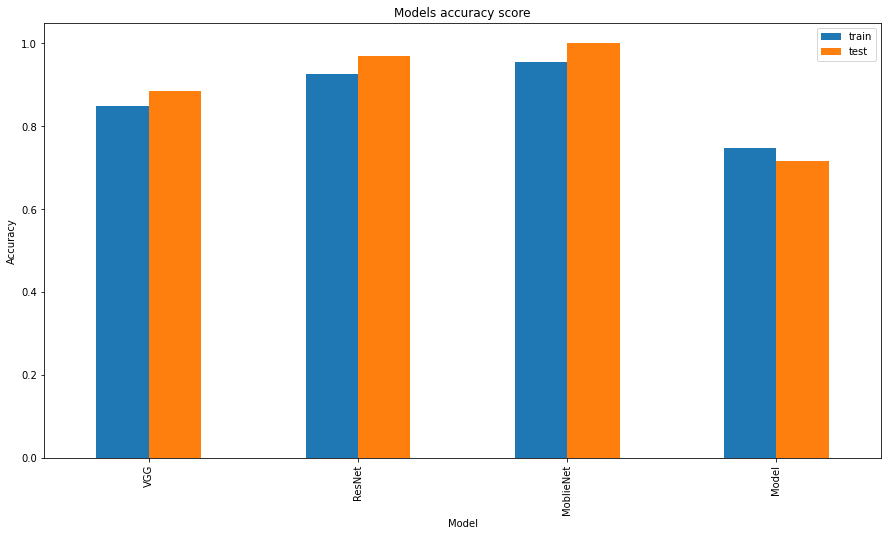

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

score_data = pd.DataFrame({

    "train":[model_VGG_score_train[1], model_ResNet_score_train[1],model_MobileNet_score_train[1],model_score_train[1]],

    "test":[model_VGG_score_test[1], model_ResNet_score_test[1],model_MobileNet_score_test[1],model_score_test[1]]},

    index=["VGG", "ResNet", "MoblieNet", "Model"])

score_data.plot(kind="bar",figsize=(15, 8))

plt.title("Models accuracy score")

plt.xlabel("Model")

plt.ylabel("Accuracy")